In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sncosmo
from bayesn import SEDmodel
import matplotlib.patches as mpatches
import os
import pandas as pd
import pickle
import corner

In [6]:
filter_yaml = "/root/partiiiproject/bayesn-filters/bayesn-filters/filters.yaml"
supernova_name = "sn2005A"
supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
lcdata = lcdata['OBS'].to_pandas()

In [7]:
model_name=""#"W22_F99_model"
dust_law = "F99"
sampleChainsDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_chains.pkl"

(1000, 1)


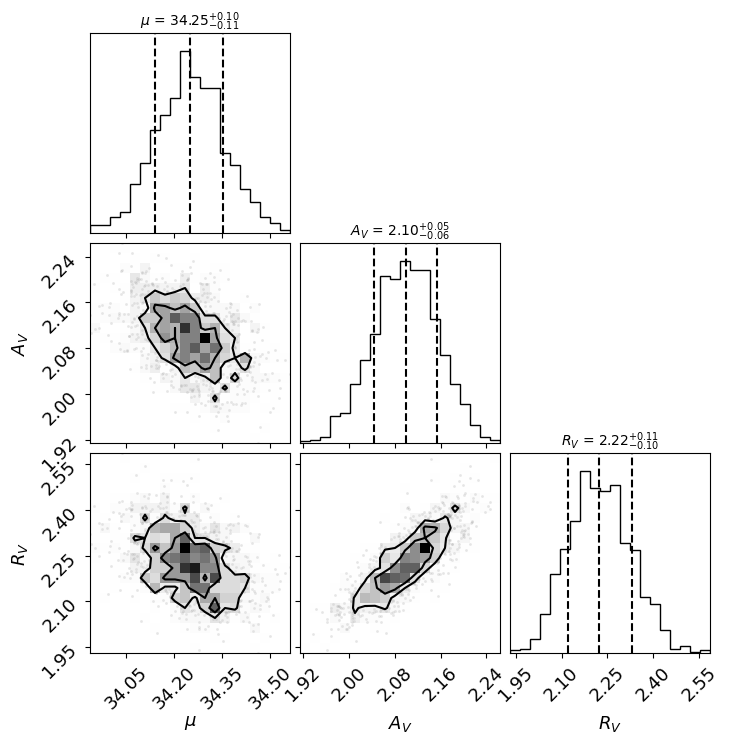

In [8]:
plt.rcParams.update({'font.size': 13})
#Load the chains with pickle
with open(sampleChainsDir, 'rb') as file:
    chains = pickle.load(file)

#model = SEDmodel(load_model="W22_model", filter_yaml = filter_yaml, load_redlaw=dust_law)
mu_samples = chains['mu']
mu_samples = np.reshape(mu_samples, (1000,1))
AV_samples = chains['AV']
AV_samples = np.reshape(AV_samples, (1000,1))
RV_samples = chains['RV']
RV_samples = np.reshape(RV_samples, (1000,1))

data = np.hstack([mu_samples, AV_samples, RV_samples])



print(np.shape(mu_samples))
figure = corner.corner(data, labels=[r"$\mu$",r"$A_{V}$",r"$R_{V}$"],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 10},
    smoothing=1,
    levels = (0.382, 0.683))
    #levels = (1-np.exp(-0.5), 1+np.exp(-0.5)))
#figure.suptitle(supernova_name + " with W22-G23")
figure.savefig("/root/partiiiproject/DustLawsGeneralGraphs/"+supernova_name+model_name+"CornerPlot.pdf", bbox_inches='tight') 